In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
datos = pd.read_csv("/content/drive/My Drive/Entrenamieto_ECI_2020.csv")

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from cycler import cycler

In [9]:
datos["Region"].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [63]:
datos["Account_Created_Year"] = pd.to_datetime(datos["Account_Created_Date"]).dt.year
datos["Opportunity_Created_Year"] = pd.to_datetime(datos["Opportunity_Created_Date"]).dt.year
datos["Quote_Expiry_Year"] = pd.to_datetime(datos["Quote_Expiry_Date"]).dt.year
datos["Last_Modified_Year"] = pd.to_datetime(datos["Last_Modified_Date"]).dt.year

In [242]:
diez_op_type = datos["Account_Owner"].value_counts().nlargest(5).reset_index()["index"]
datos_cortos = datos.loc[datos["Account_Owner"].isin(diez_op_type)]

In [241]:
diez_op_type = datos["Opportunity_Type"].value_counts().nlargest(5).reset_index()["index"]
datos_cortos_op = datos.loc[datos["Opportunity_Type"].isin(diez_op_type)]


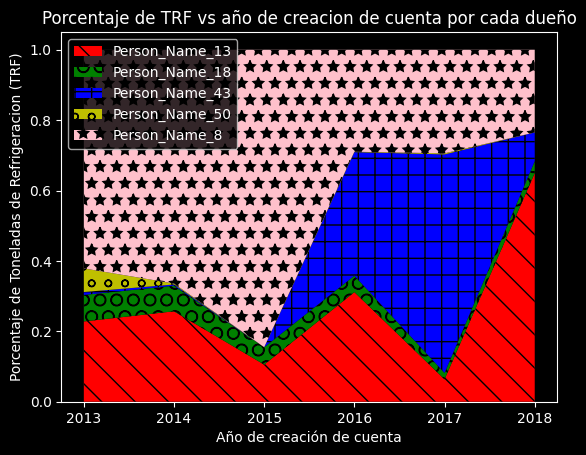

In [268]:
#datos_c = datos_cortos.loc[datos["Stage"] == "Closed Won"]
datos_c = datos_cortos
datos_area = datos_c.pivot_table(index = "Account_Created_Year",columns = "Account_Owner",values = "TRF",aggfunc = "mean")
datos_area["suma"] = datos_area.sum(axis = 1)
plt.rc('axes', prop_cycle=cycler(color=['r', 'g', 'b', 'y',"pink"]))
datos_plot = datos_area.div(datos_area["suma"],axis = 0).drop(columns = "suma")
stacks = plt.stackplot(list(datos_plot.reset_index()["Account_Created_Year"]),[datos_plot[i].fillna(0).to_list() for i in list(datos_plot)])
hatches=["\\", "O","+","o","*"]
for stack, hatch in zip(stacks, hatches):
    stack.set_hatch(hatch)
plt.ylabel("Porcentaje de Toneladas de Refrigeracion (TRF)")
plt.xlabel("Año de creación de cuenta")
plt.title("Porcentaje de TRF vs año de creacion de cuenta por cada dueño")
style.use("dark_background")
#plt.rcParams.update(plt.rcParamsDefault)
plt.legend(loc="upper left",labels = datos_plot.columns)
plt.show()

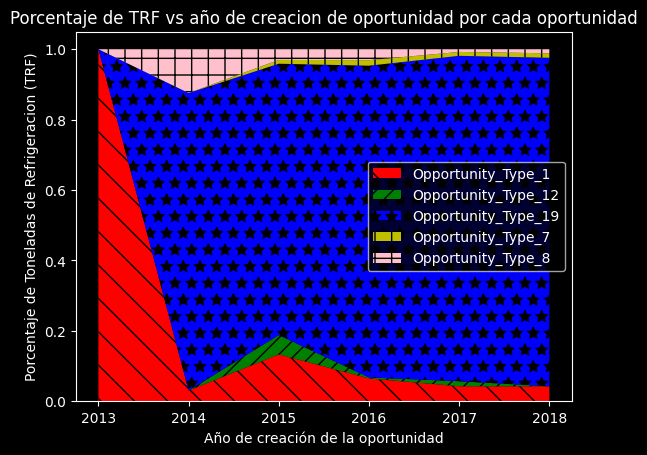

In [256]:
datos_c = datos_cortos_op.loc[datos["Stage"] == "Closed Won"]
datos_c = datos_cortos_op
datos_area = datos_c.pivot_table(index = "Opportunity_Created_Year",columns = "Opportunity_Type",values = "TRF",aggfunc = "mean")
datos_area["suma"] = datos_area.sum(axis = 1)
plt.rc('axes', prop_cycle=cycler(color=['r', 'g', 'b', 'y',"pink"]))
datos_plot = datos_area.div(datos_area["suma"],axis = 0).drop(columns = "suma")
stacks = plt.stackplot(list(datos_plot.reset_index()["Opportunity_Created_Year"]),[datos_plot[i].fillna(0).to_list() for i in list(datos_plot)])
hatches=["\\", "//","*","|","+"]
for stack, hatch in zip(stacks, hatches):
    stack.set_hatch(hatch)
plt.ylabel("Porcentaje de Toneladas de Refrigeracion (TRF)")
plt.xlabel("Año de creación de la oportunidad")
plt.title("Porcentaje de TRF vs año de creacion de oportunidad por cada oportunidad")
style.use("dark_background")
#plt.rcParams.update(plt.rcParamsDefault)
plt.legend(loc="center right",labels = datos_plot.columns)
plt.show()